<a href="https://colab.research.google.com/github/dboyko44/ML-Final-Project/blob/main/ML_Final_Project_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
dfteam=pd.read_excel('teamreport_31-12-2022_30-12-2023.xlsx')
dfSOE=pd.read_excel('SOE data.xlsx')
dfteam=dfteam.drop(columns=['Cardio load', 'Muscle load'])
dfteam=dfteam.drop(74)
for i in range(len(dfteam)):
  dfteam['Day'][i]=pd.Timestamp(dfteam["Day"][i])
dfteam.sort_values(by='Day',inplace=True)

<ipython-input-2-61f061b1aa37>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfteam['Day'][i]=pd.Timestamp(dfteam["Day"][i])


In [3]:
def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 60*(mm + 60*hh)

In [4]:
for i in range(0,len(dfteam)):
  dfteam=dfteam.replace([dfteam['Duration'][i]],[dfteam['Duration'][i].strftime("%H:%M:%S")])
  dfteam=dfteam.replace([dfteam['Duration'][i]],[time_to_num(dfteam['Duration'][i])])

In [5]:
for i in range(len(dfSOE)-1):
  start_date=dfSOE['Day'][i]
  end_date=dfSOE['Day'][i+1]
  group=dfteam[(dfteam['Day']>start_date) & (dfteam['Day']<=end_date)].index.tolist()
  print(group)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43]
[44, 45, 46, 47, 48, 49, 50]
[51, 52, 53, 54, 55, 56]
[57]
[58, 59]
[60, 61, 62]
[63, 64, 65]
[66, 67, 68]


In [45]:
#30 min bottom limit to include data
# over 27.5 mph speed is error in data
limit=time_to_num('00:30:00')

for i in range(0,len(dfteam)):
  if dfteam['Duration'][i]<limit or dfteam['Maximum speed [mph]'][i]>27.5:
    ind=dfteam[(dfteam['Duration']==dfteam['Duration'][i])].index
    dfteam=dfteam.drop(ind)

In [6]:
dfin=pd.DataFrame(columns=['Length [days]','Duration [sec]','Average heart rate [bpm]','HR max [bpm]','Average distance [yd]','Max speed [mph]','Average speed [mph]', 'Average calories [kcal]', 'Average training load','Total training load'])

In [7]:
dfin=dfin.iloc[0:0]
for i in range(len(dfSOE)-1):
  start_date=dfSOE['Day'][i]
  end_date=dfSOE['Day'][i+1]
  group=dfteam[(dfteam['Day']>start_date) & (dfteam['Day']<=end_date)].index.tolist()
  length=len(group)
  #if len(group)>1:
  duration=np.mean(dfteam['Duration'][group[0]:group[-1]+1])
  avgheartrate=np.mean(dfteam['HR avg [bpm]'][group[0]:group[-1]+1])    
  HRmax=max(dfteam['HR max [bpm]'][group[0]:group[-1]+1])
  avgdistance=np.mean(dfteam['Total distance [yd]'][group[0]:group[-1]+1])
  speedmax=max(dfteam['Maximum speed [mph]'][group[0]:group[-1]+1])
  avgspeed=np.mean(dfteam['Average speed [mph]'][group[0]:group[-1]+1])
  avgcal=np.mean(dfteam['Calories [kcal]'][group[0]:group[-1]+1])
  avgtload=np.mean(dfteam['Training load score'][group[0]:group[-1]+1])
  tottload=sum(dfteam['Training load score'][group[0]:group[-1]+1])
  dfin.loc[len(dfin.index)]=[length,duration, avgheartrate,HRmax,avgdistance,speedmax,avgspeed,avgcal,avgtload,tottload]
  print(group)

dfSOE=dfSOE.drop(0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[38, 39, 40]
[41, 42, 43]
[44, 45, 46, 47, 48, 49, 50]
[51, 52, 53, 54, 55, 56]
[57]
[58, 59]
[60, 61, 62]
[63, 64, 65]
[66, 67, 68]


<ipython-input-7-8712b46c5f0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin.loc[len(dfin.index)]=[length,duration, avgheartrate,HRmax,avgdistance,speedmax,avgspeed,avgcal,avgtload,tottload]
<ipython-input-7-8712b46c5f0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfin.loc[len(dfin.index)]=[length,duration, avgheartrate,HRmax,avgdistance,speedmax,avgspeed,avgcal,avgtload,tottload]
<ipython-input-7-8712b46c5f0b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [8]:
dfin

,Length [days],Duration [sec],Average heart rate [bpm],HR max [bpm],Average distance [yd],Max speed [mph],Average speed [mph],Average calories [kcal],Average training load,Total training load
0,19.0,13057.105263,125.368421,225.0,5734.957368,18.13,1.272632,1691.052632,195.263158,3710.0
1,7.0,13583.571429,115.142857,205.0,5556.104286,21.04,1.024286,1500.142857,143.142857,1002.0
2,12.0,10879.750000,119.250000,199.0,5342.535000,17.58,1.269167,1334.916667,142.666667,1712.0
3,3.0,12103.000000,125.000000,199.0,4776.583333,18.52,1.320000,1291.333333,138.666667,416.0
4,3.0,8966.666667,122.333333,189.0,5879.440000,35.35,1.846667,1107.666667,122.000000,366.0
5,7.0,9227.142857,121.142857,199.0,4189.140000,18.26,1.114286,1168.142857,124.428571,871.0
6,6.0,9056.333333,115.666667,190.0,4535.790000,16.99,1.245000,1035.500000,103.166667,619.0
7,1.0,10677.000000,140.000000,196.0,5903.830000,4.54,0.390000,1595.000000,192.000000,192.0
8,2.0,8566.000000,135.500000,190.0,4627.245000,16.68,1.335000,1110.500000,127.000000,254.0
9,3.0,8944.666667,120.666667,194.0,4815.633333,17.12,1.003333,1154.000000,131.666667,395.0


In [9]:
dfSOE

,Team,Day,Percent SOE,Score RPI,Score other,W/L
1,Post U,2023-01-28,1.000000,21,6,1
2,Stevens,2023-02-05,0.733333,12,8,1
3,Coast Guard,2023-02-18,0.400000,11,12,0
4,Clark,2023-02-22,0.933333,17,2,1
5,Desales,2023-02-26,0.800000,16,10,1
6,Muhlenburg,2023-03-05,0.600000,11,6,1
7,MIT,2023-03-11,0.400000,10,14,0
8,Middlebury,2023-03-12,0.600000,9,10,0
9,Hamilton,2023-03-15,0.600000,12,15,0
10,Vassar,2023-03-18,0.733333,18,7,1


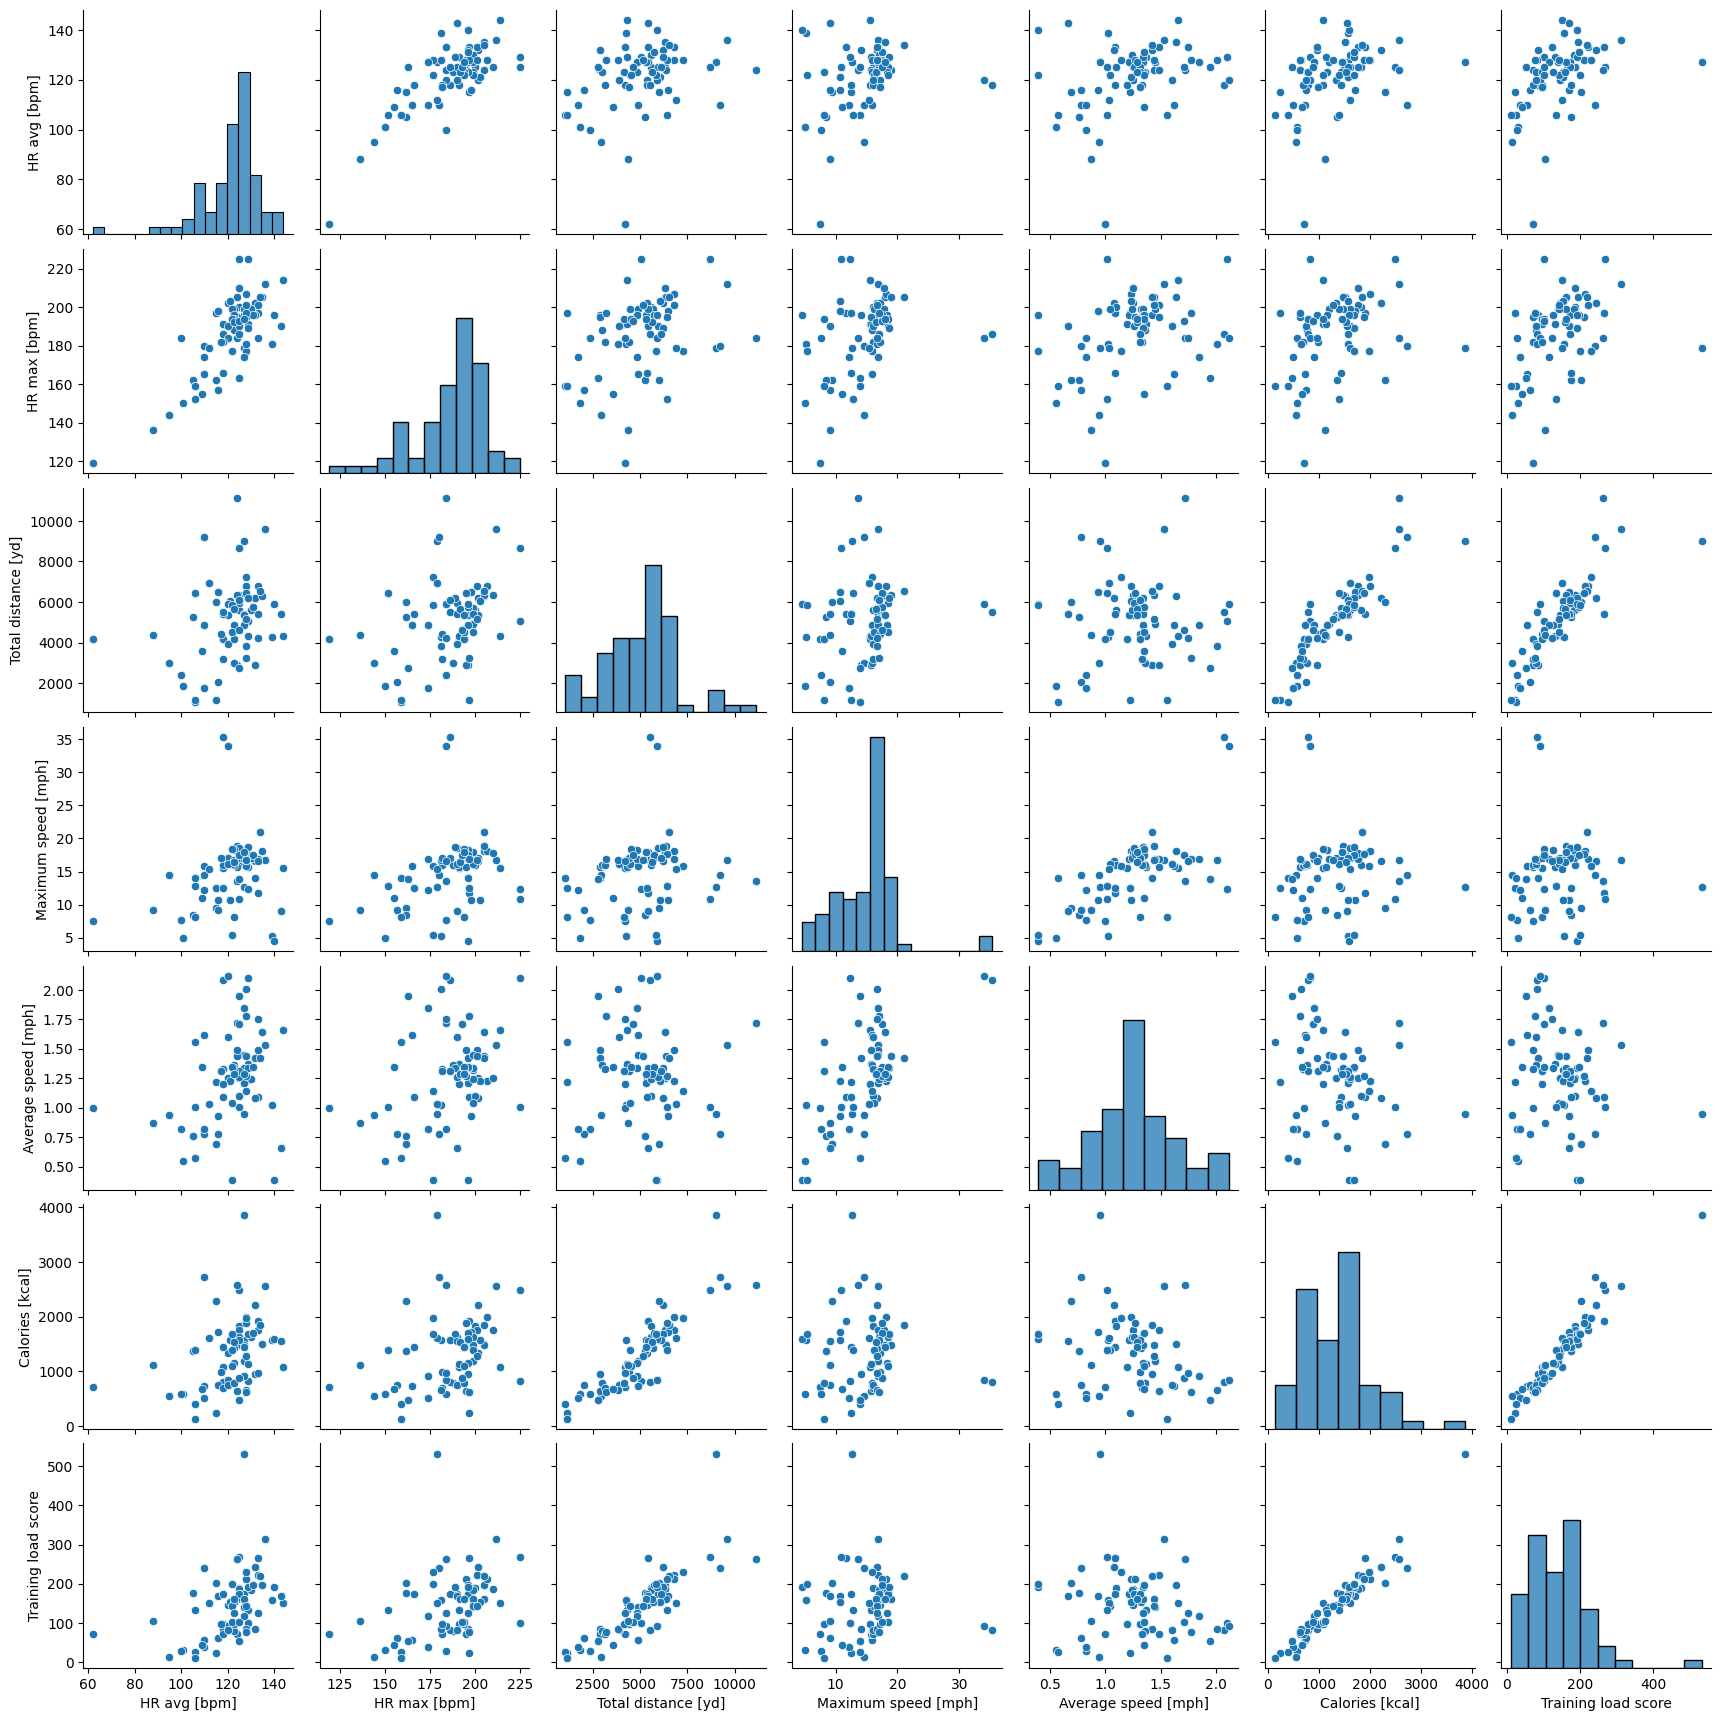

In [57]:
sns.pairplot(dfteam.drop(labels=['Day','Duration'],axis=1))

In [10]:
#split dataset into input (x) and output (y)
dfin=dfin.drop(columns=['Max speed [mph]','Average speed [mph]'])
X=dfin.to_numpy()
y=dfSOE['Percent SOE'].to_numpy()

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *

#define keras model
model = Sequential()

model.add(Dense(125,input_dim=8,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=500,batch_size=5, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 125)               1125      
                                                                 
 dense_17 (Dense)            (None, 125)               15750     
                                                                 
 dense_18 (Dense)            (None, 125)               15750     
                                                                 
 dense_19 (Dense)            (None, 1)                 126       
                                                                 
Total params: 32,751
Trainable params: 32,751
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 73ms/step
[19.0, 13057.105263157895, 125.36842105263158, 225.0, 5734.957368421052, 1691.0526315789473, 195.26315789473685, 3710.0] => -2.97 